#### 4.1 Implementing the Method of Least Squares


The method of least squares, as the basis of classification and regression algorithms, has a long history. It seeks the best function fit by minimizing the sum of the squares of the residuals. The unknown parameters can be easily obtained using the method of least squares, and the sum of squared residuals between the predicated data and the actual data is minimized.

In [5]:
import numpy as np  
import scipy as sp  
import pylab as pl  
from scipy.optimize import leastsq # Introduce the least squares function.

n = 9 # Degree of a polynomial


In [6]:
def real_func(x):  
# Objective function: sin(2*pi*x)
    return np.sin(2 * np.pi * x)  

In [7]:
def fit_func(p, x):  
    f = np.poly1d(p)  
    return f(x)  


In [8]:
def residuals_func(p, y, x):  
    ret = fit_func(p, x) - y  
    return ret  

x = np.linspace(0, 1, 9) # Randomly select nine points.
x_points = np.linspace(0, 1, 1000) # Continuous points required for drawing
y0 = real_func(x) # Objective function


In [9]:
x

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])

In [10]:
x_points

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.07307307, 0.07407

In [11]:
y0 

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16])

Fitting Parameters: [-1.62788678e+03  6.83566697e+03 -1.18998707e+04  1.10144307e+04
 -5.75415930e+03  1.67115032e+03 -2.60926402e+02  2.13801511e+01
 -2.25925783e-03]


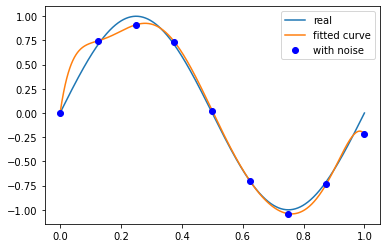

In [12]:
y1 = [np.random.normal(0, 0.1) + y for y in y0] # Add a noise function to the objective function, making the result comply with normal distribution.
p_init = np.random.randn(n) # Randomly initialize polynomial parameters.
# Invoke the leastsq function in SciPy.optimize to find the best fitting function by minimizing the sum of squared residuals .
# func is a residual function. x0 is the initial parameter value. Package parameters except the initialized parameter in the residual function into args.
plsq = leastsq(func=residuals_func, x0=p_init, args=(y1, x))  

print ('Fitting Parameters:', plsq[0]) # Output fitting parameters.

pl.plot(x_points, real_func(x_points), label='real')  
pl.plot(x_points, fit_func(plsq[0], x_points), label='fitted curve')  
pl.plot(x, y1, 'bo', label='with noise')  
pl.legend()  
pl.show()


#### 4.2 Gradient Descent

Gradient descent, also known as steepest descent, is the most popular method for solving unconstrained optimization problems. It is an iterative method and the main operation of each step is to find the gradient vector of the objective function. In this process, one takes steps proportional to the negative of the gradient of the function at the current point (because the objective function descends fastest in this direction, and this is why it is also called steep descent). 
Gradient descent is zigzagging slowly with small step sizes towards the target value.


In [13]:
x = [(1, 0., 3), (1, 1., 3), (1, 2., 3), (1, 3., 2), (1, 4., 4)]  
y = [95.3654, 97.2172, 75.1958, 60.1055, 49.3422]  #y[i] Output corresponding to the sample point  
min_error = 1  # Iteration stops when iteration loss reaches the threshold.  
alpha = 0.1  # Learning rate 
diff = [0, 0]  
max_itor = 2000  
error1 = 0  
error0 = 0  
cnt = 0  
m = len(x)  
# Initialize parameters.  
theta0 = 0  
theta1 = 0  
theta2 = 0  
# Maximum number of iterations: max_itor
while max_itor>cnt:
    cnt += 1  

    # Iterative calculation of parameters
    for i in range(m): 
        #pred = theta0 * x[0] + theta1 * x[1] +theta2 * x[2]  
        # Calculate the residual, that is, the fitting function value minus the actual value.  
        diff[0] = (theta0* x[i][0] + theta1 * x[i][1] + theta2 * x[i][2]) - y[i]  
  
        # Gradient = diff[0] * x[i][j]. Update the parameter based on the step multiplied by the gradient. 
        theta0 -= alpha * diff[0] * x[i][0]  
        theta1 -= alpha * diff[0] * x[i][1]  
        theta2 -= alpha * diff[0] * x[i][2]  
        error1 += (y[i]-(theta0 + theta1 * x[i][1] + theta2 * x[i][2]))**2/2  
    # Output the parameters and errors of each iteration.
    print(' theta0 : %f, theta1 : %f, theta2 : %f, error1 : %f' % (theta0, theta1, theta2, error1))  
    # If the error meets the requirement, the loop exits.
    if error1<min_error:
        break
    # If the error does not meet the requirement, reset the error and continue the optimization.
    else:
        error1=0


print('Done: theta0 : %f, theta1 : %f, theta2 : %f' % (theta0, theta1, theta2)  )
print(' Number of iterations: %d' % cnt  )


 theta0 : 2.139933, theta1 : -27.724338, theta2 : -3.044255, error1 : 14571.167678
 theta0 : 8.959493, theta1 : -54.847388, theta2 : 1.806547, error1 : 32065.455361
 theta0 : 17.669207, theta1 : -80.785377, theta2 : 6.577540, error1 : 54411.042590
 theta0 : 28.063114, theta1 : -104.985455, theta2 : 11.165807, error1 : 79505.506231
 theta0 : 39.900504, theta1 : -126.937429, theta2 : 15.473314, error1 : 105050.146223
 theta0 : 52.911449, theta1 : -146.184466, theta2 : 19.408996, error1 : 128751.626438
 theta0 : 66.802932, theta1 : -162.332539, theta2 : 22.890670, error1 : 148519.523809
 theta0 : 81.265410, theta1 : -175.058432, theta2 : 25.846747, error1 : 162642.856882
 theta0 : 95.979687, theta1 : -184.116126, theta2 : 28.217687, error1 : 169930.774234
 theta0 : 110.623933, theta1 : -189.341463, theta2 : 29.957190, error1 : 169805.929973
 theta0 : 124.880698, theta1 : -190.654979, theta2 : 31.033082, error1 : 162343.348250
 theta0 : 138.443764, theta1 : -188.062881, theta2 : 31.427886,

#### 4.3 The Method of Lagrange Multipliers

The method of Lagrange multiplier is popular for solving equation optimization problems. The basic idea is to convert a problem with n variables and k constraints into an unconstrained problem with (n+k ) variables, namely, implementing the Lagrangian function. Then specify the partial derivative of the Lagrange function to 0, and compute the extrema.

#### Step 1	Import the required libraries.


In [14]:
from scipy.optimize import minimize
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt


##### Step 2	Define the objective function as (a-b*x0)**2+(c-d*x1)**2. 

In [15]:
def func(a,b,c,d):
    fun = lambda x: (a-b*x[0])**2 + (c-d*x[1])**2
    return fun

#### Step 3	Define constraints, such as equality and inequality constraints.

In [16]:
def con(args):
#type: Specify whether the constraint is an equality or an inequality. fun: Constraint function
    cons = ({'type': 'ineq', 'fun': lambda x: abs(x[0]) + abs(x[1]) - args})
    return cons


##### Step 4	Draw a 3D figure.

In [21]:
def draw3D():
  # Plot a figure.
  fig = plt.figure()
  # Add a 3D axis.
  ax = Axes3D(fig)
# Define the range of the x-axis and y-axis. The meshgrid function draws grids on the plane with points on two coordinate axes.
  x_arange = np.arange(-10, 10)
  y_arange = np.arange(-10, 10)
  X, Y = np.meshgrid(x_arange, y_arange)
  # Z1 is the objective function and Z2 is the constraint.
  Z1 = (2-X)**2 + (3-2*Y)**2
  Z2 = abs(X)+abs(Y)-4
  # Draw the figure.
  plt.xlabel('x')
  plt.ylabel('y')
  # Draw a three-dimensional surface plot. rstride and cstride indicate the strides of rows and columns respectively and cmap indicates the surface color.
  ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap='rainbow')
  ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap='rainbow')
  plt.show()

# Draw a contour plot.
def drawContour():
    x_arange = np.linspace(-10.0, 10.0, 256)
    y_arange = np.linspace(-10.0, 10.0, 256)
    X, Y = np.meshgrid(x_arange, y_arange)
    Z1 = (2 - X) ** 2 + (3 - 2 * Y) ** 2
    Z2 = abs(X) + abs(Y)-4
    plt.xlabel('x')
    plt.ylabel('y')
# Draw the contours of the objective function and constraint. 8 represents the density of the contour, alpha: indicates the contour transparency, and cmap indicates the color.
# contourf: Impute the area between the contour lines. Contour: Draw contour lines.
    plt.contourf(X, Y, Z1, 8, alpha=0.75, cmap='rainbow')
    plt.contourf(X, Y, Z2, 8, alpha=0.75, cmap='rainbow')
    C1 = plt.contour(X, Y, Z1, 16, colors='black')
    C2 = plt.contour(X, Y, Z2, 8, colors='blue')
# Add a label to the contour line. When inline is true, write the label in the contour line. fontsize indicates the font.
    plt.clabel(C1, inline=True, fontsize=10)
    plt.clabel(C2, inline=True, fontsize=10)
    plt.show()


##### Step 5	Implement optimization.

min fun = 0.20000000000000026
success ?: True
optimum point: [2.4 1.6]


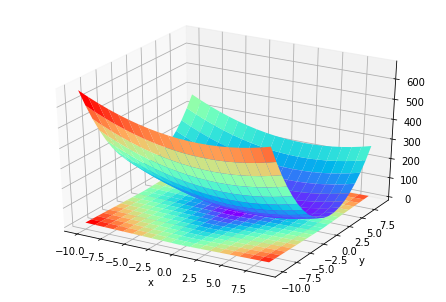

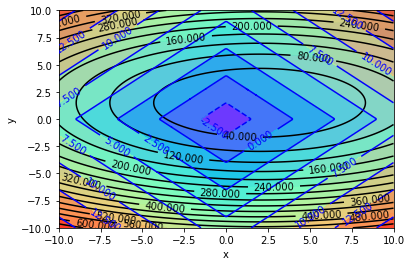

In [23]:
if __name__ == "__main__":
    cons = con(4) # The constraint is |x0|+|x1|=4.
x0 = np.array((1, 1)) # The setting of the initial value is very important. It is easy to converge to another extrema. You need to try several values.
"""Find the minimum value of the objective function. func is a residual function. x0 is the initial parameter value. Package parameters except the initialized parameter in the residual function into args.
method indicates the optimization method such as BFGS, SLSQP, and Newton-CG.
constraints indicates the constraint."""
res = minimize(func(2,1,3,2), x0, method='SLSQP', constraints=cons)
# Output the function value.
print("min fun =",res.fun)
# Output whether the optimization is successful.
print("success ?:",res.success)
# Output the optimum point.
print("optimum point:",res.x) 
     # Invoke the function to create a figure.
draw3D()
drawContour()
